In [596]:
import random
import numpy as np
import timeit
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy

import requests
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [597]:
round(random.random(),2)

0.78

In [598]:
random.randint(-10,10)

-7

In [599]:
random.randrange(0,99,5)

65

In [600]:
random.uniform(-10,10)

3.711521405151828

In [601]:
x = 1
latitudes = []
while x < 11:
    random_lat = random.uniform(-90,90)
    latitudes.append(random_lat)
    x += 1

In [602]:
for x in latitudes:
    print(round(x,3))

55.28
6.623
47.618
7.618
-32.332
11.369
21.989
-73.135
-68.447
-27.477


In [603]:
x = 1
longitudes = []
while x < 11:
    random_long = random.uniform(-90,90)
    longitudes.append(random_long)
    x += 1

In [604]:
for x in longitudes:
    print(round(x,3))

48.587
-9.073
36.763
-36.353
14.036
14.358
35.887
69.194
-55.674
-46.582


In [605]:
%timeit np.random.uniform(low=-90, high=90, size=1500)

13 µs ± 839 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [606]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.uniform(-90,90)
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.

%timeit latitudes(1500)

477 µs ± 21.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [607]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90,90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.

latitudes(5)

[-47.61119885317071,
 -73.31228350771687,
 -71.30399295014406,
 0.06802781802568925,
 88.69015386670729]

In [608]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90, high=90, size=1200)
longs = np.random.uniform(low=-90, high=90, size=1200)
latlongs = zip(lats, longs)
latlongs

In [609]:
# Add the latitudes and longitudes to a list.
coordinates = list(latlongs)
print(coordinates[:3])

[(17.394199509109512, 11.214215856972373), (-74.07667303863472, 7.810957456140542), (-29.130545291301203, -66.22419688706195)]


In [610]:
# Create a list for holding the cities.
cities = []
countries = []
full_location = zip(cities, countries)
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    #city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name, citipy.nearest_city(coordinate[0], coordinate[1]).country_code
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

494

In [612]:
cities[:5]

['bilma', 'hermanus', 'la rioja', 'kilindoni', 'bredasdorp']

In [613]:
first_city = cities[0]
first_city

'bilma'

In [614]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7ed6207ebdf7a3629fda9718ad01bfb3&q="

In [615]:
query_url = url + first_city
print(query_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7ed6207ebdf7a3629fda9718ad01bfb3&q=bilma


In [616]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [617]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + cities[i]

In [618]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 10 | bilma
Processing Record 2 of Set 10 | hermanus
Processing Record 3 of Set 10 | la rioja
Processing Record 4 of Set 10 | kilindoni
Processing Record 5 of Set 10 | bredasdorp
Processing Record 6 of Set 10 | jamestown
Processing Record 7 of Set 10 | ilulissat
Processing Record 8 of Set 10 | hunza
City not found. Skipping...
Processing Record 9 of Set 10 | imbituba
Processing Record 10 of Set 10 | ushuaia
Processing Record 11 of Set 10 | coquimbo
Processing Record 12 of Set 10 | longyearbyen
Processing Record 13 of Set 10 | nurota
Processing Record 14 of Set 10 | georgetown
Processing Record 15 of Set 10 | vite
Processing Record 16 of Set 10 | los llanos de aridane
Processing Record 17 of Set 10 | angra
City not found. Skipping...
Processing Record 18 of Set 10 | port alfred
Processing Record 19 of Set 10 | gamba
Processing Record 20 of Set 10 | oussouye
Processing Record 21 of Set 10 | ponta do sol
Processing Record 22 of Set 10 | middelkerke
Processing Rec

City not found. Skipping...
Processing Record 34 of Set 13 | canico
Processing Record 35 of Set 13 | kandy
Processing Record 36 of Set 13 | narendranagar
Processing Record 37 of Set 13 | sovetskiy
Processing Record 38 of Set 13 | carnarvon
Processing Record 39 of Set 13 | axim
Processing Record 40 of Set 13 | gondar
Processing Record 41 of Set 13 | walvis bay
Processing Record 42 of Set 13 | rio gallegos
Processing Record 43 of Set 13 | the valley
Processing Record 44 of Set 13 | tukums
Processing Record 45 of Set 13 | kouroussa
Processing Record 46 of Set 13 | batticaloa
Processing Record 47 of Set 13 | beisfjord
Processing Record 48 of Set 13 | saint-pierre
Processing Record 49 of Set 13 | porto torres
Processing Record 50 of Set 13 | sidhauli
Processing Record 1 of Set 14 | zolotyy potik
Processing Record 2 of Set 14 | kerki
City not found. Skipping...
Processing Record 3 of Set 14 | haukipudas
Processing Record 4 of Set 14 | mkushi
Processing Record 5 of Set 14 | sao geraldo do ara

Processing Record 17 of Set 17 | bam
Processing Record 18 of Set 17 | malwan
City not found. Skipping...
Processing Record 19 of Set 17 | umba
Processing Record 20 of Set 17 | caxito
Processing Record 21 of Set 17 | maldonado
Processing Record 22 of Set 17 | urumqi
Processing Record 23 of Set 17 | chapais
Processing Record 24 of Set 17 | fenoarivo atsinanana
Processing Record 25 of Set 17 | fuerte olimpo
Processing Record 26 of Set 17 | abha
Processing Record 27 of Set 17 | husavik
Processing Record 28 of Set 17 | jalu
Processing Record 29 of Set 17 | tumannyy
City not found. Skipping...
Processing Record 30 of Set 17 | vicuna
Processing Record 31 of Set 17 | manchester
Processing Record 32 of Set 17 | chipinge
Processing Record 33 of Set 17 | aranos
Processing Record 34 of Set 17 | saint-augustin
Processing Record 35 of Set 17 | oktyabrskoye
Processing Record 36 of Set 17 | kargil
Processing Record 37 of Set 17 | aksu
Processing Record 38 of Set 17 | ayna
Processing Record 39 of Set 1

In [622]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bilma,18.6853,12.9164,70.14,22,0,7.74,NE,2021-01-10 23:00:57
1,Hermanus,-34.4187,19.2345,66.00,71,49,4.00,ZA,2021-01-10 23:00:58
2,La Rioja,42.2500,-2.5000,35.01,69,20,14.97,ES,2021-01-10 23:00:58
3,Kilindoni,-7.9139,39.6668,80.78,80,97,19.17,TZ,2021-01-10 23:00:58
4,Bredasdorp,-34.5322,20.0403,66.20,72,99,9.22,ZA,2021-01-10 23:00:58
5,Jamestown,42.0970,-79.2353,33.01,74,1,3.44,US,2021-01-10 22:58:19
6,Ilulissat,69.2167,-51.1000,19.40,68,75,3.06,GL,2021-01-10 23:00:58
7,Imbituba,-28.2400,-48.6703,78.80,83,75,12.66,BR,2021-01-10 23:00:58
8,Ushuaia,-54.8000,-68.3000,44.60,93,75,16.11,AR,2021-01-10 22:57:41
9,Coquimbo,-29.9533,-71.3436,64.40,72,0,12.66,CL,2021-01-10 23:00:59


In [623]:
nador = city_data_df.loc[(city_data_df['Wind Speed'] == 5.75) & (city_data_df['City'] == 'Nador')]
nador

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [624]:
windy = city_data_df.loc[(city_data_df['Wind Speed'] >= 12.75)]
windy = windy.sort_values(['Wind Speed'], ascending=False)
windy

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
411,San Carlos De Bariloche,-41.1456,-71.3082,51.80,54,40,26.46,AR,2021-01-10 23:01:45
58,Maniitsoq,65.4167,-52.9000,33.19,96,100,24.70,GL,2021-01-10 23:01:07
376,Pisco,-13.7000,-76.2167,75.20,73,0,24.16,PE,2021-01-10 23:01:41
194,Luderitz,-26.6481,15.1594,69.21,63,8,23.51,NA,2021-01-10 23:01:23
360,Puerto Ayora,-0.7393,-90.3518,80.60,65,0,23.02,EC,2021-01-10 23:01:39
...,...,...,...,...,...,...,...,...,...
125,Rawson,-43.3002,-65.1023,68.40,31,100,13.33,AR,2021-01-10 23:01:15
30,Chuy,-33.6971,-53.4616,73.90,91,14,13.22,UY,2021-01-10 23:01:02
105,Iracoubo,5.4802,-53.2011,78.31,84,6,13.15,GF,2021-01-10 23:01:13
132,Adrar,20.5022,-10.0711,55.83,36,53,13.11,MR,2021-01-10 23:01:16


In [625]:
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bilma,NE,2021-01-10 23:00:57,18.6853,12.9164,70.14,22,0,7.74
1,Hermanus,ZA,2021-01-10 23:00:58,-34.4187,19.2345,66.00,71,49,4.00
2,La Rioja,ES,2021-01-10 23:00:58,42.2500,-2.5000,35.01,69,20,14.97
3,Kilindoni,TZ,2021-01-10 23:00:58,-7.9139,39.6668,80.78,80,97,19.17
4,Bredasdorp,ZA,2021-01-10 23:00:58,-34.5322,20.0403,66.20,72,99,9.22
...,...,...,...,...,...,...,...,...,...
446,Ribeira Brava,PT,2021-01-10 23:01:48,32.6500,-17.0667,53.01,82,21,9.57
447,Moose Factory,CA,2021-01-10 23:01:48,51.2585,-80.6094,17.60,93,90,14.97
448,Marawi,PH,2021-01-10 23:01:49,7.9986,124.2928,75.00,94,76,3.00
449,Kongolo,CD,2021-01-10 23:01:49,-5.3833,27.0000,68.56,93,82,1.41


In [626]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

Text(0, 0.5, 'Max Temperature (F)')

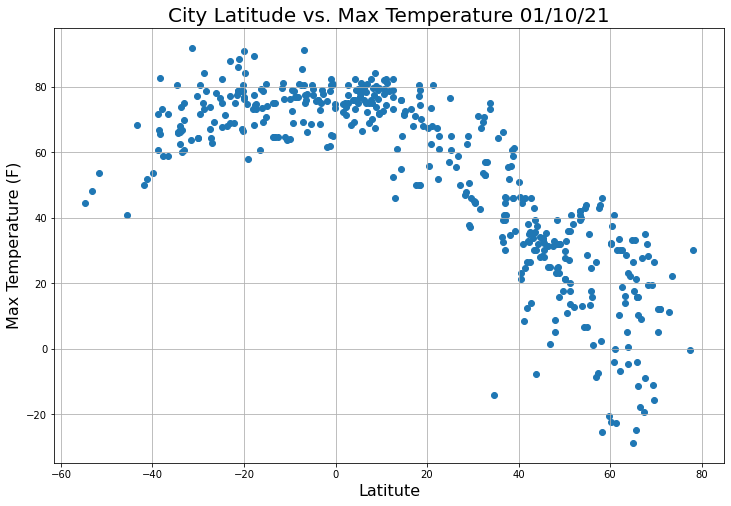

In [627]:
plt.subplots(figsize=(12,8))

plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
plt.title('City Latitude vs. Max Temperature 01/10/21', fontsize=20)
plt.grid()
plt.xlabel('Latitute', fontsize=16)
plt.ylabel('Max Temperature (F)', fontsize=16)

In [628]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [629]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'01/10/21'

/Users/Admin/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


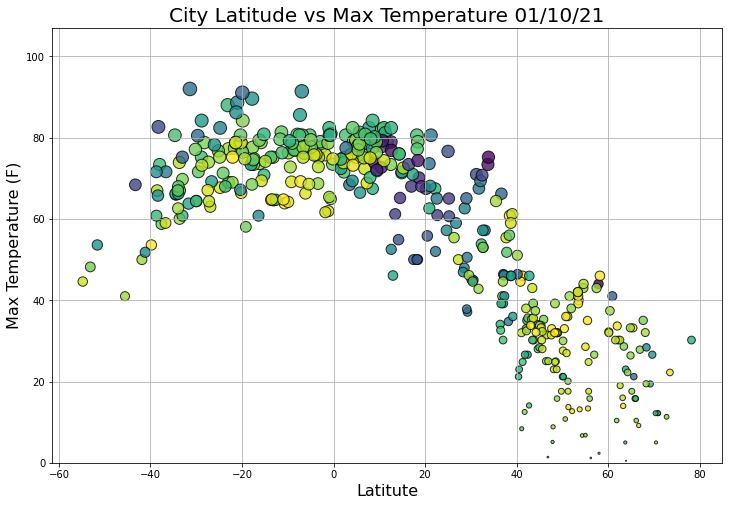

In [630]:
plt.subplots(figsize=(12,8))

vcolor=[str(item/255.) for item in city_data_df['Max Temp']]


plt.scatter(city_data_df['Lat'],
            city_data_df['Max Temp'],
            linewidths=1,
            alpha=0.8,
            c=city_data_df['Humidity'],
            edgecolor='black',
            marker='o',
            s=city_data_df['Max Temp'] * 2,
            label='Cities')
plt.title(f'City Latitude vs Max Temperature {today}', fontsize=20)
plt.grid()
plt.xlabel('Latitute', fontsize=16)
plt.ylabel('Max Temperature (F)', fontsize=16)
plt.ylim(0,107)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

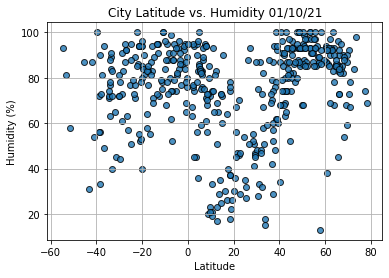

In [631]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

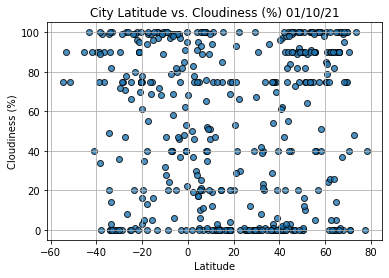

In [632]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

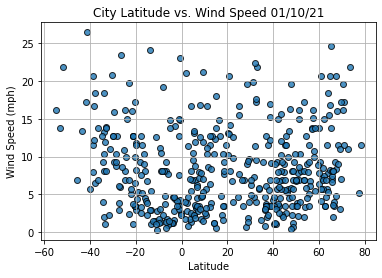

In [633]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [634]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [635]:
thirteeth = city_data_df.loc[13]
thirteeth

City                         Vite
Country                        IN
Date          2021-01-10 23:00:59
Lat                       17.2833
Lng                         74.55
Max Temp                    71.01
Humidity                       64
Cloudiness                      0
Wind Speed                   4.79
Name: 13, dtype: object

In [636]:
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
northern_hemi_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bilma,NE,2021-01-10 23:00:57,18.6853,12.9164,70.14,22,0,7.74
2,La Rioja,ES,2021-01-10 23:00:58,42.2500,-2.5000,35.01,69,20,14.97
5,Jamestown,US,2021-01-10 22:58:19,42.0970,-79.2353,33.01,74,1,3.44
6,Ilulissat,GL,2021-01-10 23:00:58,69.2167,-51.1000,19.40,68,75,3.06
10,Longyearbyen,SJ,2021-01-10 23:00:59,78.2186,15.6401,30.20,69,40,11.50


In [637]:
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]
southern_hemi_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Hermanus,ZA,2021-01-10 23:00:58,-34.4187,19.2345,66.00,71,49,4.00
3,Kilindoni,TZ,2021-01-10 23:00:58,-7.9139,39.6668,80.78,80,97,19.17
4,Bredasdorp,ZA,2021-01-10 23:00:58,-34.5322,20.0403,66.20,72,99,9.22
7,Imbituba,BR,2021-01-10 23:00:58,-28.2400,-48.6703,78.80,83,75,12.66
8,Ushuaia,AR,2021-01-10 22:57:41,-54.8000,-68.3000,44.60,93,75,16.11


# Scatterplots for Temperature

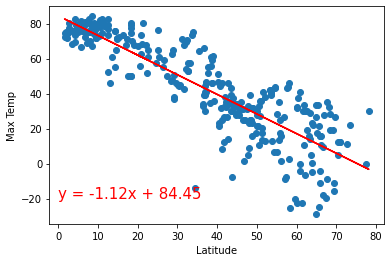

In [638]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-20))

In [639]:
linregress(x_values, y_values)
print(r_value)

-0.8892828081151702


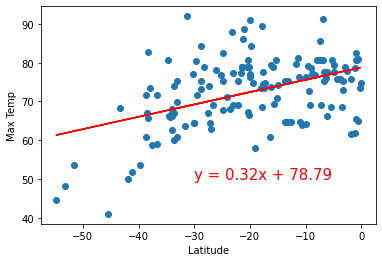

In [640]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
southern_regression = plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-30,50))

In [641]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.4536583227079014


# Scatterplots for Humidity

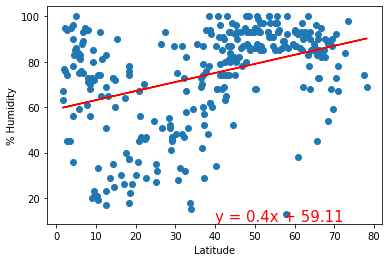

In [642]:
# Linear regression on humidity in the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

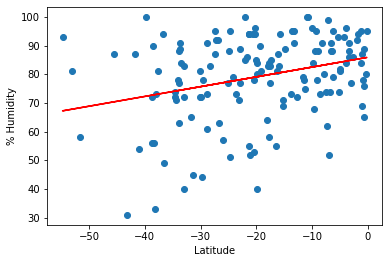

In [643]:
# Linear regression on humidity in the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-25,17))

# Scatterplots for Cloudiness

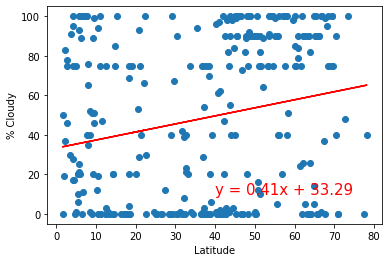

In [648]:
# Linear regression on cloudiness in the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudy',(40,10))

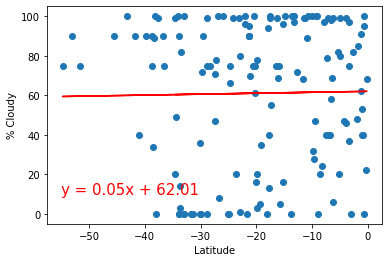

In [650]:
# Linear regression on cloudiness in the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudy',(-55,10))

# Scatterplots for Wind Speed

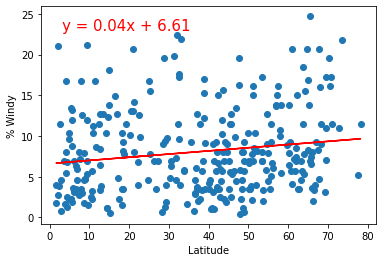

In [657]:
# Linear regression for wind speed in the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Windiness', '% Windy',(3,23))

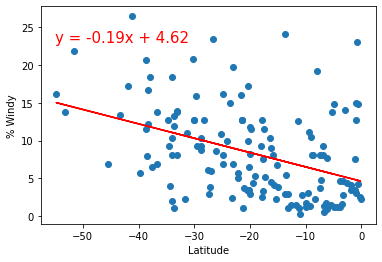

In [655]:
# Linear regression on wind speed in the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Windy',(-55,23))